In [77]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

d)

In [78]:
th = 5
N = 100

sample = np.array([(1-random())**(1/(1-th)) for i in range(N)])

sample

array([2.24185014, 1.43636857, 1.00064004, 1.42873213, 1.8512387 ,
       1.0194349 , 1.06368539, 1.3400807 , 2.78253   , 1.14123614,
       1.48841183, 1.03500398, 1.27758073, 1.71493165, 1.69130955,
       1.2268937 , 1.11021831, 2.64286683, 1.29908817, 1.38382671,
       1.03360396, 1.22947865, 1.08433077, 1.57348267, 1.15071765,
       1.05573159, 1.1297496 , 1.75249355, 1.03784553, 2.07375617,
       1.14671141, 1.28738772, 1.18881518, 1.87275527, 1.03047357,
       1.06644734, 1.43463867, 1.6800839 , 1.89229949, 1.2276019 ,
       1.60094732, 1.07540719, 1.16521449, 2.94370619, 1.32172048,
       1.01282277, 1.03577999, 1.13014866, 1.80984384, 1.14962716,
       1.28649871, 1.16771502, 1.48912744, 1.0595822 , 1.65562653,
       1.46670425, 1.21106017, 1.24638327, 1.00093126, 1.28905504,
       1.35535226, 1.34586202, 1.18122676, 1.16515892, 1.117587  ,
       1.06288857, 4.35669022, 1.33615318, 1.62771151, 1.03599426,
       1.03149846, 1.21574665, 1.0091421 , 1.2087141 , 1.12326

In [79]:
b = 0.95
mean_ln = np.mean([np.log(x) for x in sample])
g_th = 2 ** (mean_ln)


lb = g_th - 1.96 * g_th * np.log(2) * mean_ln / np.sqrt(N)
ub = g_th + 1.96 * g_th * np.log(2) * mean_ln / np.sqrt(N)

print(f"Доверительный интервал: ({lb}, {ub})")


Доверительный интервал: (1.1640880799303825, 1.2540744770253707)


In [80]:
lb = 1 - (1.96 - np.sqrt(N)) / (mean_ln * np.sqrt(N))
ub = 1 + (1.96 + np.sqrt(N)) / (mean_ln * np.sqrt(N))
asymp = (lb,ub)
print(f"Доверительный интервал: ({lb}, {ub})")

Доверительный интервал: (3.9352575218474, 5.36637810463867)


e)

In [81]:
#Непараметрический бутстрап

n = 1000
h = 1 + 1 / mean_ln

bootstrap = []
for i in range(n):
    choice = np.random.choice(sample, size=N)
    bootstrap.append(1 + 1 / (np.mean([np.log(x) for x in choice])) - h)

sorted_bootstrap = np.sort(bootstrap)
t1 = sorted_bootstrap[int(((1 - b) * 1000) / 2)]
t2 = sorted_bootstrap[int(((1 + b) * 1000) / 2)]

lb = h - t2
ub = h - t1
neparam = (lb,ub)
print(f"Непараметрический доверительный интервал: ({lb}, {ub})")

Непараметрический доверительный интервал: (3.7815118044850653, 5.245175097770595)


In [82]:
#Параметрический бутстрап

n = 50000

h = 1 + 1 / mean_ln
bootstrap = []

for i in range(n):
    choice = []
    for j in range(N):
        y = random()
        choice.append((1-y)**(1/(1-h)))
    bootstrap.append(1 + 1 / (np.mean([np.log(x) for x in choice])) - h)

sorted_bootstrap = np.sort(bootstrap)
t1 = sorted_bootstrap[int(((1 - b) * n) / 2)]
t2 = sorted_bootstrap[int(((1 + b) * n) / 2)]

lb = h - t2
ub = h - t1
param = (lb,ub)
print(f"Параметрический доверительный интервал: ({lb}, {ub})")

Параметрический доверительный интервал: (3.8267697821455195, 5.275252006385348)


f)

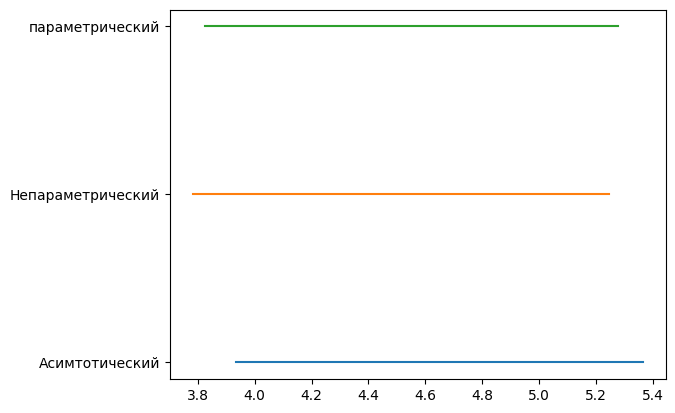

In [83]:
for i, di in enumerate([asymp, neparam, param]):
    plt.plot((di[0], di[1]),(i,i))

_ = plt.yticks(range(3), ["Асимтотический", "Непараметрический", "параметрический"])